## 1️⃣ Setup & Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import glob

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


In [2]:
# Define paths
BASE_PATH = Path(r'c:\Users\urayu\OneDrive\Desktop\UIDI')
BIO_PATH = BASE_PATH / 'api_data_aadhar_biometric' / 'api_data_aadhar_biometric'
DEMO_PATH = BASE_PATH / 'api_data_aadhar_demographic' / 'api_data_aadhar_demographic'

print(f"📁 Biometric Path: {BIO_PATH}")
print(f"📁 Demographic Path: {DEMO_PATH}")

📁 Biometric Path: c:\Users\urayu\OneDrive\Desktop\UIDI\api_data_aadhar_biometric\api_data_aadhar_biometric
📁 Demographic Path: c:\Users\urayu\OneDrive\Desktop\UIDI\api_data_aadhar_demographic\api_data_aadhar_demographic


In [3]:
# Load Biometric Data
bio_files = list(BIO_PATH.glob('*.csv'))
print(f"📊 Found {len(bio_files)} biometric files:")
for f in bio_files:
    print(f"   - {f.name}")

df_bio = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)
print(f"\n✅ Biometric data loaded: {len(df_bio):,} records")

📊 Found 4 biometric files:
   - api_data_aadhar_biometric_0_500000.csv
   - api_data_aadhar_biometric_1000000_1500000.csv
   - api_data_aadhar_biometric_1500000_1861108.csv
   - api_data_aadhar_biometric_500000_1000000.csv

✅ Biometric data loaded: 1,861,108 records


In [4]:
# Load Demographic Data
demo_files = list(DEMO_PATH.glob('*.csv'))
print(f"📊 Found {len(demo_files)} demographic files:")
for f in demo_files:
    print(f"   - {f.name}")

df_demo = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)
print(f"\n✅ Demographic data loaded: {len(df_demo):,} records")

📊 Found 5 demographic files:
   - api_data_aadhar_demographic_0_500000.csv
   - api_data_aadhar_demographic_1000000_1500000.csv
   - api_data_aadhar_demographic_1500000_2000000.csv
   - api_data_aadhar_demographic_2000000_2071700.csv
   - api_data_aadhar_demographic_500000_1000000.csv

✅ Demographic data loaded: 2,071,700 records


## 2️⃣ Data Cleaning & Preprocessing

In [5]:
# Display Biometric Data Info
print("="*60)
print("📋 BIOMETRIC DATA SCHEMA")
print("="*60)
print(f"\nShape: {df_bio.shape}")
print(f"\nColumns: {df_bio.columns.tolist()}")
print(f"\nData Types:\n{df_bio.dtypes}")
print(f"\nMissing Values:\n{df_bio.isnull().sum()}")
print(f"\nSample Data:")
df_bio.head()

📋 BIOMETRIC DATA SCHEMA

Shape: (1861108, 6)

Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

Data Types:
date            object
state           object
district        object
pincode          int64
bio_age_5_17     int64
bio_age_17_      int64
dtype: object

Missing Values:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Sample Data:


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [6]:
# Display Demographic Data Info
print("="*60)
print("📋 DEMOGRAPHIC DATA SCHEMA")
print("="*60)
print(f"\nShape: {df_demo.shape}")
print(f"\nColumns: {df_demo.columns.tolist()}")
print(f"\nData Types:\n{df_demo.dtypes}")
print(f"\nMissing Values:\n{df_demo.isnull().sum()}")
print(f"\nSample Data:")
df_demo.head()

📋 DEMOGRAPHIC DATA SCHEMA

Shape: (2071700, 6)

Columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

Data Types:
date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

Missing Values:
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Sample Data:


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [7]:
# Data Cleaning - Convert date columns
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y')
df_demo['date'] = pd.to_datetime(df_demo['date'], format='%d-%m-%Y')

# Rename columns for clarity
df_bio = df_bio.rename(columns={
    'bio_age_5_17': 'bio_youth',
    'bio_age_17_': 'bio_adult'
})

df_demo = df_demo.rename(columns={
    'demo_age_5_17': 'demo_youth',
    'demo_age_17_': 'demo_adult'
})

# Add total columns
df_bio['bio_total'] = df_bio['bio_youth'] + df_bio['bio_adult']
df_demo['demo_total'] = df_demo['demo_youth'] + df_demo['demo_adult']

# Extract date features
for df in [df_bio, df_demo]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.day_name()
    df['month_name'] = df['date'].dt.month_name()

print("✅ Data cleaning completed!")
print(f"\nBiometric columns: {df_bio.columns.tolist()}")
print(f"Demographic columns: {df_demo.columns.tolist()}")

✅ Data cleaning completed!

Biometric columns: ['date', 'state', 'district', 'pincode', 'bio_youth', 'bio_adult', 'bio_total', 'year', 'month', 'day', 'weekday', 'month_name']
Demographic columns: ['date', 'state', 'district', 'pincode', 'demo_youth', 'demo_adult', 'demo_total', 'year', 'month', 'day', 'weekday', 'month_name']


In [8]:
# Merge datasets on common keys
df_merged = pd.merge(
    df_bio, 
    df_demo, 
    on=['date', 'state', 'district', 'pincode', 'year', 'month', 'day', 'weekday', 'month_name'],
    how='outer'
)

# Fill NaN with 0 for authentication counts
df_merged = df_merged.fillna(0)

# Calculate combined metrics
df_merged['total_auth'] = df_merged['bio_total'] + df_merged['demo_total']
df_merged['total_youth'] = df_merged['bio_youth'] + df_merged['demo_youth']
df_merged['total_adult'] = df_merged['bio_adult'] + df_merged['demo_adult']

print(f"✅ Merged dataset shape: {df_merged.shape}")
print(f"\nDate range: {df_merged['date'].min()} to {df_merged['date'].max()}")
df_merged.head()

✅ Merged dataset shape: (2769161, 18)

Date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00


,date,state,district,pincode,bio_youth,bio_adult,bio_total,year,month,day,weekday,month_name,demo_youth,demo_adult,demo_total,total_auth,total_youth,total_adult
0,2025-03-01,Andaman & Nicobar Islands,Andamans,744101,16.00,193.00,209.00,2025,3,1,Saturday,March,0.00,0.00,0.00,209.00,16.00,193.00
1,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,101.00,48.00,149.00,2025,3,1,Saturday,March,16.00,180.00,196.00,345.00,117.00,228.00
2,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,101.00,48.00,149.00,2025,3,1,Saturday,March,16.00,180.00,196.00,345.00,117.00,228.00
3,2025-03-01,Andaman and Nicobar Islands,Nicobar,744302,15.00,12.00,27.00,2025,3,1,Saturday,March,0.00,0.00,0.00,27.00,15.00,12.00
4,2025-03-01,Andaman and Nicobar Islands,Nicobar,744303,46.00,27.00,73.00,2025,3,1,Saturday,March,0.00,0.00,0.00,73.00,46.00,27.00


## 3️⃣ Exploratory Data Analysis (EDA)

In [ ]:
# Summary Statistics
print("="*60)
print("📊 SUMMARY STATISTICS")
print("="*60)

print("\n🔹 Biometric Authentication:")
print(df_bio[['bio_youth', 'bio_adult', 'bio_total']].describe())

print("\n🔹 Demographic Authentication:")
print(df_demo[['demo_youth', 'demo_adult', 'demo_total']].describe())

In [9]:
# Key Metrics Dashboard
print("="*60)
print("📈 KEY METRICS DASHBOARD")
print("="*60)

metrics = {
    'Total Biometric Records': f"{len(df_bio):,}",
    'Total Demographic Records': f"{len(df_demo):,}",
    'Unique States': df_merged['state'].nunique(),
    'Unique Districts': df_merged['district'].nunique(),
    'Unique Pincodes': df_merged['pincode'].nunique(),
    'Date Range': f"{df_merged['date'].min().strftime('%d-%m-%Y')} to {df_merged['date'].max().strftime('%d-%m-%Y')}",
    'Total Bio Auth (Youth)': f"{df_bio['bio_youth'].sum():,}",
    'Total Bio Auth (Adult)': f"{df_bio['bio_adult'].sum():,}",
    'Total Demo Auth (Youth)': f"{df_demo['demo_youth'].sum():,}",
    'Total Demo Auth (Adult)': f"{df_demo['demo_adult'].sum():,}",
}

for key, value in metrics.items():
    print(f"  {key}: {value}")

📈 KEY METRICS DASHBOARD
  Total Biometric Records: 1,861,108
  Total Demographic Records: 2,071,700
  Unique States: 66
  Unique Districts: 996
  Unique Pincodes: 19807
  Date Range: 01-03-2025 to 29-12-2025
  Total Bio Auth (Youth): 34,226,855
  Total Bio Auth (Adult): 35,536,240
  Total Demo Auth (Youth): 4,863,424
  Total Demo Auth (Adult): 44,431,763


## 4️⃣ State-wise Analysis

In [10]:
# State-wise aggregation
state_bio = df_bio.groupby('state').agg({
    'bio_youth': 'sum',
    'bio_adult': 'sum',
    'bio_total': 'sum',
    'district': 'nunique',
    'pincode': 'nunique'
}).rename(columns={'district': 'num_districts', 'pincode': 'num_pincodes'})

state_demo = df_demo.groupby('state').agg({
    'demo_youth': 'sum',
    'demo_adult': 'sum',
    'demo_total': 'sum'
})

state_analysis = state_bio.join(state_demo)
state_analysis['total_auth'] = state_analysis['bio_total'] + state_analysis['demo_total']
state_analysis['bio_ratio'] = (state_analysis['bio_total'] / state_analysis['total_auth'] * 100).round(2)
state_analysis['youth_ratio'] = ((state_analysis['bio_youth'] + state_analysis['demo_youth']) / state_analysis['total_auth'] * 100).round(2)
state_analysis = state_analysis.sort_values('total_auth', ascending=False)

print("📊 State-wise Authentication Summary (Top 15):")
state_analysis.head(15)

📊 State-wise Authentication Summary (Top 15):


,bio_youth,bio_adult,bio_total,num_districts,num_pincodes,demo_youth,demo_adult,demo_total,total_auth,bio_ratio,youth_ratio
state,,,,,,,,,,,
Uttar Pradesh,6207105,3370630,9577735,90,1753,790308.00,7752020.00,8542328.00,18120063.00,52.86,38.62
Maharashtra,3512712,5713427,9226139,52,1607,273322.00,4781280.00,5054602.00,14280741.00,64.61,26.51
Bihar,2208141,2689446,4897587,47,917,380023.00,4434327.00,4814350.00,9711937.00,50.43,26.65
Madhya Pradesh,3200117,2723654,5923771,60,797,407098.00,2505840.00,2912938.00,8836709.00,67.04,40.82
Tamil Nadu,2227252,2470865,4698117,45,2088,315638.00,1896590.00,2212228.00,6910345.00,67.99,36.80
Rajasthan,2066747,1928208,3994955,46,986,257224.00,2560391.00,2817615.00,6812570.00,58.64,34.11
West Bengal,1040470,1483978,2524448,58,1354,242549.00,3629623.00,3872172.00,6396620.00,39.47,20.06
Andhra Pradesh,2241448,1473144,3714592,45,1847,321143.00,1974362.00,2295505.00,6010097.00,61.81,42.64
Gujarat,1460655,1735859,3196514,39,1026,208474.00,1615853.00,1824327.00,5020841.00,63.66,33.24


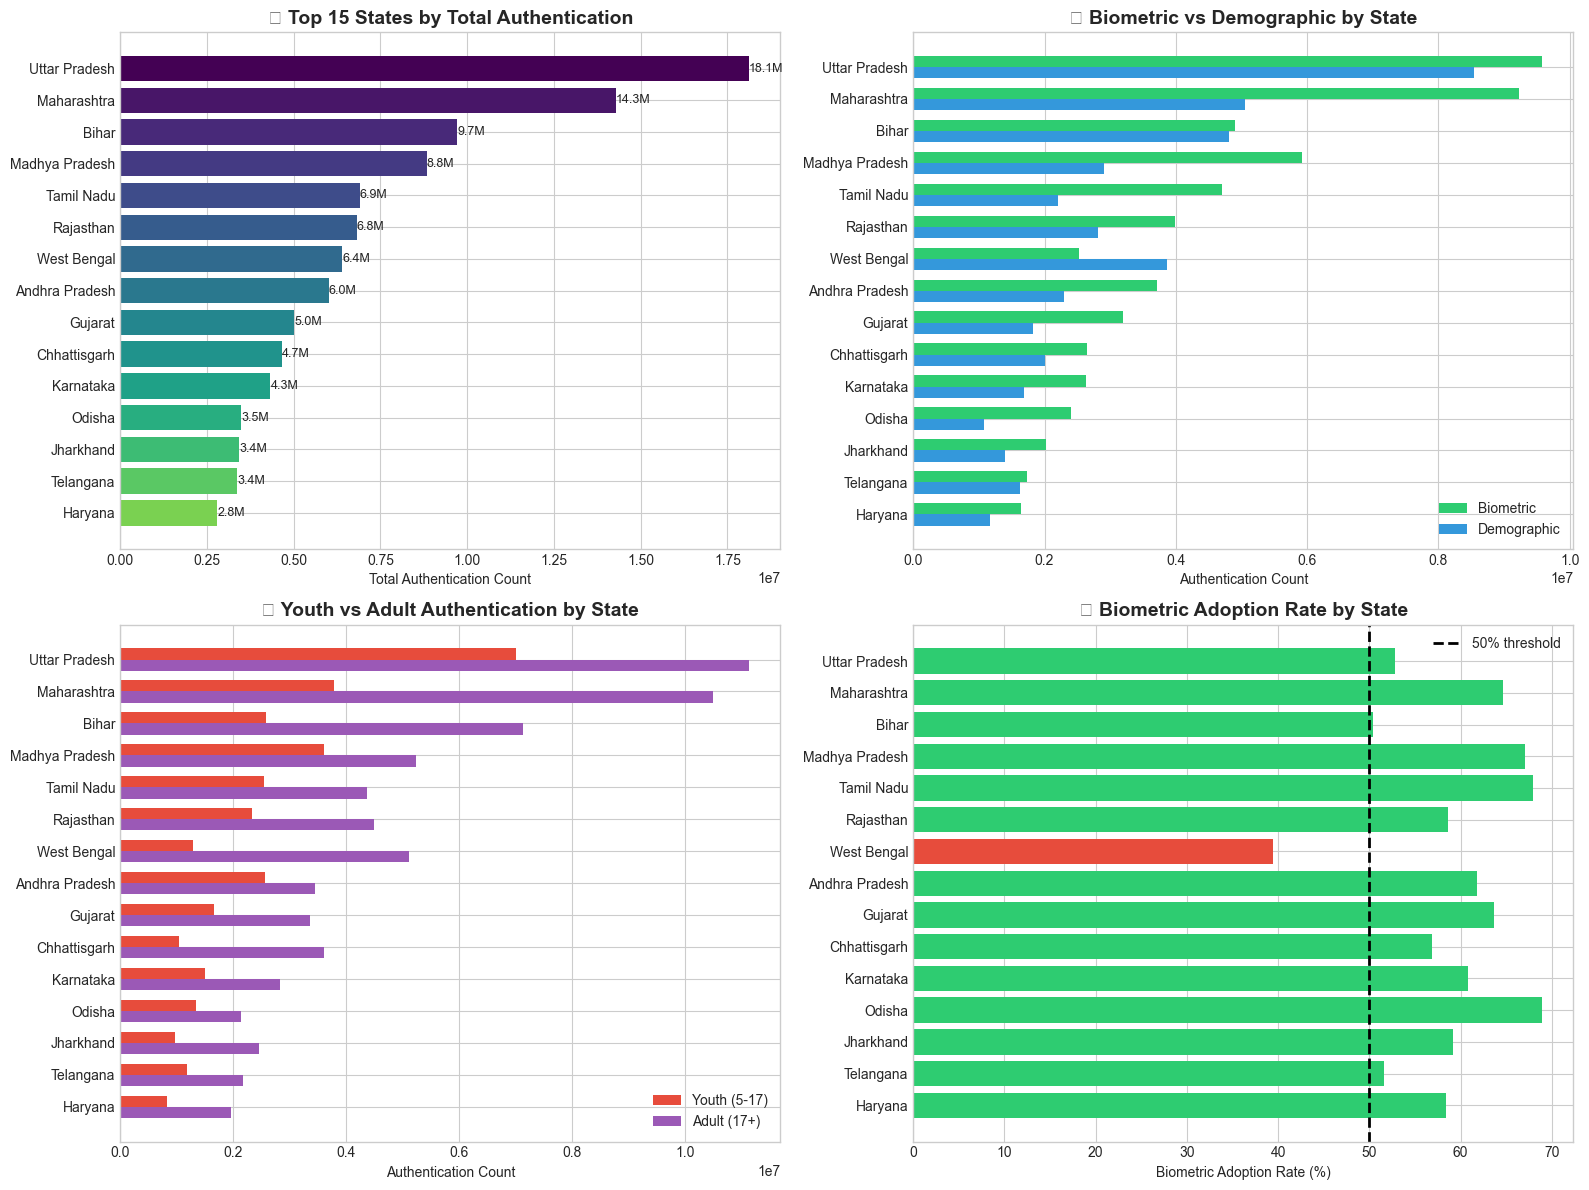


✅ Chart saved as 'state_analysis.png'


In [11]:
# Visualization: Top 15 States by Total Authentication
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Authentication by State
top_states = state_analysis.head(15)
colors = plt.cm.viridis(np.linspace(0, 0.8, 15))
ax1 = axes[0, 0]
bars = ax1.barh(top_states.index, top_states['total_auth'], color=colors)
ax1.set_xlabel('Total Authentication Count')
ax1.set_title('🏆 Top 15 States by Total Authentication', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
for bar, val in zip(bars, top_states['total_auth']):
    ax1.text(val, bar.get_y() + bar.get_height()/2, f'{val/1e6:.1f}M', va='center', fontsize=9)

# Plot 2: Biometric vs Demographic Split
ax2 = axes[0, 1]
x = np.arange(len(top_states))
width = 0.35
ax2.barh(x - width/2, top_states['bio_total'], width, label='Biometric', color='#2ecc71')
ax2.barh(x + width/2, top_states['demo_total'], width, label='Demographic', color='#3498db')
ax2.set_yticks(x)
ax2.set_yticklabels(top_states.index)
ax2.set_xlabel('Authentication Count')
ax2.set_title('🔐 Biometric vs Demographic by State', fontsize=14, fontweight='bold')
ax2.legend()
ax2.invert_yaxis()

# Plot 3: Youth vs Adult Distribution
ax3 = axes[1, 0]
youth_total = top_states['bio_youth'] + top_states['demo_youth']
adult_total = top_states['bio_adult'] + top_states['demo_adult']
ax3.barh(x - width/2, youth_total, width, label='Youth (5-17)', color='#e74c3c')
ax3.barh(x + width/2, adult_total, width, label='Adult (17+)', color='#9b59b6')
ax3.set_yticks(x)
ax3.set_yticklabels(top_states.index)
ax3.set_xlabel('Authentication Count')
ax3.set_title('👥 Youth vs Adult Authentication by State', fontsize=14, fontweight='bold')
ax3.legend()
ax3.invert_yaxis()

# Plot 4: Biometric Adoption Rate
ax4 = axes[1, 1]
colors_ratio = ['#2ecc71' if x > 50 else '#e74c3c' for x in top_states['bio_ratio']]
bars = ax4.barh(top_states.index, top_states['bio_ratio'], color=colors_ratio)
ax4.axvline(x=50, color='black', linestyle='--', linewidth=2, label='50% threshold')
ax4.set_xlabel('Biometric Adoption Rate (%)')
ax4.set_title('📊 Biometric Adoption Rate by State', fontsize=14, fontweight='bold')
ax4.invert_yaxis()
ax4.legend()

plt.tight_layout()
plt.savefig(BASE_PATH / 'state_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'state_analysis.png'")

## 5️⃣ Temporal Trend Analysis

In [ ]:
# Daily trend aggregation
daily_bio = df_bio.groupby('date').agg({
    'bio_youth': 'sum',
    'bio_adult': 'sum',
    'bio_total': 'sum'
}).reset_index()

daily_demo = df_demo.groupby('date').agg({
    'demo_youth': 'sum',
    'demo_adult': 'sum',
    'demo_total': 'sum'
}).reset_index()

daily_merged = pd.merge(daily_bio, daily_demo, on='date', how='outer').fillna(0)
daily_merged['total_auth'] = daily_merged['bio_total'] + daily_merged['demo_total']
daily_merged = daily_merged.sort_values('date')

print(f"📅 Daily data from {daily_merged['date'].min()} to {daily_merged['date'].max()}")
print(f"📊 Total days: {len(daily_merged)}")
daily_merged.head(10)

In [ ]:
# Time Series Visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Plot 1: Total Daily Authentication Trend
ax1 = axes[0]
ax1.plot(daily_merged['date'], daily_merged['total_auth'], color='#3498db', linewidth=1.5, label='Total')
ax1.fill_between(daily_merged['date'], daily_merged['total_auth'], alpha=0.3, color='#3498db')
ax1.set_title('📈 Daily Total Authentication Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Authentication')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Biometric vs Demographic Trend
ax2 = axes[1]
ax2.plot(daily_merged['date'], daily_merged['bio_total'], color='#2ecc71', linewidth=1.5, label='Biometric')
ax2.plot(daily_merged['date'], daily_merged['demo_total'], color='#e74c3c', linewidth=1.5, label='Demographic')
ax2.set_title('🔐 Biometric vs Demographic Daily Trend', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Authentication Count')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Youth vs Adult Trend
ax3 = axes[2]
daily_merged['total_youth'] = daily_merged['bio_youth'] + daily_merged['demo_youth']
daily_merged['total_adult'] = daily_merged['bio_adult'] + daily_merged['demo_adult']
ax3.plot(daily_merged['date'], daily_merged['total_youth'], color='#9b59b6', linewidth=1.5, label='Youth (5-17)')
ax3.plot(daily_merged['date'], daily_merged['total_adult'], color='#f39c12', linewidth=1.5, label='Adult (17+)')
ax3.set_title('👥 Youth vs Adult Daily Trend', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Authentication Count')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(BASE_PATH / 'temporal_trends.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'temporal_trends.png'")

In [ ]:
# Weekday Analysis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_bio = df_bio.groupby('weekday')['bio_total'].sum().reindex(weekday_order)
weekday_demo = df_demo.groupby('weekday')['demo_total'].sum().reindex(weekday_order)

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(weekday_order))
width = 0.35

ax.bar(x - width/2, weekday_bio, width, label='Biometric', color='#2ecc71')
ax.bar(x + width/2, weekday_demo, width, label='Demographic', color='#3498db')
ax.set_xticks(x)
ax.set_xticklabels(weekday_order, rotation=45)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Authentication')
ax.set_title('📅 Authentication by Day of Week', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig(BASE_PATH / 'weekday_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'weekday_analysis.png'")

## 6️⃣ District-Level Deep Dive

In [ ]:
# District-wise aggregation
district_analysis = df_merged.groupby(['state', 'district']).agg({
    'bio_total': 'sum',
    'demo_total': 'sum',
    'total_auth': 'sum',
    'bio_youth': 'sum',
    'bio_adult': 'sum',
    'demo_youth': 'sum',
    'demo_adult': 'sum',
    'pincode': 'nunique'
}).rename(columns={'pincode': 'num_pincodes'}).reset_index()

district_analysis['bio_ratio'] = (district_analysis['bio_total'] / district_analysis['total_auth'] * 100).round(2)
district_analysis['youth_ratio'] = ((district_analysis['bio_youth'] + district_analysis['demo_youth']) / district_analysis['total_auth'] * 100).round(2)
district_analysis = district_analysis.sort_values('total_auth', ascending=False)

print("📊 Top 20 Districts by Authentication Volume:")
district_analysis.head(20)

In [ ]:
# Top 20 Districts Visualization
top_districts = district_analysis.head(20).copy()
top_districts['label'] = top_districts['district'] + ' (' + top_districts['state'].str[:3] + ')'

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Total Auth by District
ax1 = axes[0]
colors = plt.cm.plasma(np.linspace(0, 0.8, 20))
bars = ax1.barh(top_districts['label'], top_districts['total_auth'], color=colors)
ax1.set_xlabel('Total Authentication')
ax1.set_title('🏆 Top 20 Districts by Volume', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Plot 2: Bio Ratio by District
ax2 = axes[1]
colors_ratio = ['#2ecc71' if x > 50 else '#e74c3c' for x in top_districts['bio_ratio']]
ax2.barh(top_districts['label'], top_districts['bio_ratio'], color=colors_ratio)
ax2.axvline(x=50, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Biometric Ratio (%)')
ax2.set_title('📊 Biometric Adoption Rate', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig(BASE_PATH / 'district_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'district_analysis.png'")

## 7️⃣ Anomaly Detection

In [ ]:
# Statistical Anomaly Detection using IQR method
def detect_anomalies_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    anomalies = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return anomalies, lower_bound, upper_bound

# Detect anomalies in daily authentication
anomalies_daily, lb, ub = detect_anomalies_iqr(daily_merged, 'total_auth')

print("="*60)
print("⚠️ ANOMALY DETECTION REPORT")
print("="*60)
print(f"\n📊 Daily Total Authentication:")
print(f"   Lower Bound: {lb:,.0f}")
print(f"   Upper Bound: {ub:,.0f}")
print(f"   Anomalies Found: {len(anomalies_daily)}")

if len(anomalies_daily) > 0:
    print("\n📅 Anomalous Days:")
    print(anomalies_daily[['date', 'total_auth', 'bio_total', 'demo_total']].to_string())

In [ ]:
# District-level anomalies
anomalies_district, lb_d, ub_d = detect_anomalies_iqr(district_analysis, 'total_auth')

print(f"\n📊 District-level Authentication:")
print(f"   Lower Bound: {lb_d:,.0f}")
print(f"   Upper Bound: {ub_d:,.0f}")
print(f"   High-Volume Districts (Anomalies): {len(anomalies_district[anomalies_district['total_auth'] > ub_d])}")
print(f"   Low-Volume Districts (Anomalies): {len(anomalies_district[anomalies_district['total_auth'] < lb_d])}")

# High volume anomalies
high_anomalies = anomalies_district[anomalies_district['total_auth'] > ub_d]
print("\n🔥 Exceptionally High-Volume Districts:")
print(high_anomalies[['state', 'district', 'total_auth', 'bio_ratio']].head(10).to_string())

In [ ]:
# Anomaly Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Daily Authentication with Anomalies
ax1 = axes[0, 0]
ax1.plot(daily_merged['date'], daily_merged['total_auth'], color='#3498db', linewidth=1)
ax1.axhline(y=ub, color='red', linestyle='--', label=f'Upper Bound ({ub:,.0f})')
ax1.axhline(y=lb, color='orange', linestyle='--', label=f'Lower Bound ({lb:,.0f})')
if len(anomalies_daily) > 0:
    ax1.scatter(anomalies_daily['date'], anomalies_daily['total_auth'], color='red', s=50, zorder=5, label='Anomalies')
ax1.set_title('📈 Daily Authentication with Anomaly Bounds', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of Daily Auth
ax2 = axes[0, 1]
ax2.hist(daily_merged['total_auth'], bins=50, color='#3498db', edgecolor='white', alpha=0.7)
ax2.axvline(x=ub, color='red', linestyle='--', linewidth=2, label='Upper Bound')
ax2.axvline(x=lb, color='orange', linestyle='--', linewidth=2, label='Lower Bound')
ax2.set_title('📊 Distribution of Daily Authentication', fontsize=12, fontweight='bold')
ax2.set_xlabel('Total Authentication')
ax2.set_ylabel('Frequency')
ax2.legend()

# Plot 3: Box Plot by Authentication Type
ax3 = axes[1, 0]
box_data = [daily_merged['bio_total'], daily_merged['demo_total']]
bp = ax3.boxplot(box_data, labels=['Biometric', 'Demographic'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#3498db')
ax3.set_title('📦 Distribution by Authentication Type', fontsize=12, fontweight='bold')
ax3.set_ylabel('Daily Count')

# Plot 4: District Auth Distribution
ax4 = axes[1, 1]
ax4.hist(district_analysis['total_auth'], bins=50, color='#9b59b6', edgecolor='white', alpha=0.7)
ax4.axvline(x=ub_d, color='red', linestyle='--', linewidth=2, label='Upper Bound')
ax4.set_title('📊 Distribution of District Authentication', fontsize=12, fontweight='bold')
ax4.set_xlabel('Total Authentication')
ax4.set_ylabel('Number of Districts')
ax4.legend()

plt.tight_layout()
plt.savefig(BASE_PATH / 'anomaly_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'anomaly_analysis.png'")

## 8️⃣ Geographic Heatmap

In [ ]:
# State-wise Heatmap Data
state_heatmap = state_analysis[['bio_total', 'demo_total', 'bio_ratio', 'youth_ratio', 'num_districts', 'num_pincodes']].copy()

# Normalize for heatmap
state_heatmap_normalized = (state_heatmap - state_heatmap.min()) / (state_heatmap.max() - state_heatmap.min())

fig, ax = plt.subplots(figsize=(14, 16))
sns.heatmap(
    state_heatmap_normalized, 
    annot=state_heatmap.round(0).astype(int), 
    fmt='d', 
    cmap='YlOrRd', 
    linewidths=0.5,
    ax=ax
)
ax.set_title('🗺️ State-wise Metrics Heatmap (Normalized)', fontsize=14, fontweight='bold')
ax.set_xlabel('Metrics')
ax.set_ylabel('State')

plt.tight_layout()
plt.savefig(BASE_PATH / 'state_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'state_heatmap.png'")

In [ ]:
# Correlation Analysis
correlation_cols = ['bio_youth', 'bio_adult', 'bio_total', 'demo_youth', 'demo_adult', 'demo_total', 'total_auth']
correlation_matrix = df_merged[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    fmt='.2f',
    linewidths=0.5,
    ax=ax
)
ax.set_title('🔗 Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(BASE_PATH / 'correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'correlation_matrix.png'")

## 9️⃣ Age Group Analysis

In [ ]:
# Age Group Summary
age_summary = {
    'Category': ['Youth (5-17)', 'Adult (17+)'],
    'Biometric': [df_bio['bio_youth'].sum(), df_bio['bio_adult'].sum()],
    'Demographic': [df_demo['demo_youth'].sum(), df_demo['demo_adult'].sum()]
}
age_df = pd.DataFrame(age_summary)
age_df['Total'] = age_df['Biometric'] + age_df['Demographic']
age_df['Bio_Pct'] = (age_df['Biometric'] / age_df['Total'] * 100).round(2)
age_df['Demo_Pct'] = (age_df['Demographic'] / age_df['Total'] * 100).round(2)

print("📊 Age Group Authentication Summary:")
print(age_df.to_string(index=False))

# Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Overall Youth vs Adult
ax1 = axes[0]
ax1.pie(age_df['Total'], labels=age_df['Category'], autopct='%1.1f%%', colors=['#e74c3c', '#3498db'], explode=[0.05, 0])
ax1.set_title('👥 Youth vs Adult\n(Overall)', fontsize=12, fontweight='bold')

# Biometric Distribution
ax2 = axes[1]
ax2.pie(age_df['Biometric'], labels=age_df['Category'], autopct='%1.1f%%', colors=['#e74c3c', '#3498db'], explode=[0.05, 0])
ax2.set_title('🔐 Youth vs Adult\n(Biometric)', fontsize=12, fontweight='bold')

# Demographic Distribution
ax3 = axes[2]
ax3.pie(age_df['Demographic'], labels=age_df['Category'], autopct='%1.1f%%', colors=['#e74c3c', '#3498db'], explode=[0.05, 0])
ax3.set_title('📋 Youth vs Adult\n(Demographic)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(BASE_PATH / 'age_group_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'age_group_analysis.png'")

## 🔟 Key Insights & Recommendations

In [12]:
# Generate Key Insights
print("="*70)
print("🎯 KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS")
print("="*70)

# Insight 1: Top performing states
top_3_states = state_analysis.head(3).index.tolist()
print(f"\n📌 INSIGHT 1: High-Activity States")
print(f"   Top 3 states: {', '.join(top_3_states)}")
print(f"   ➡️ Recommendation: Study their infrastructure as best practices")

# Insight 2: Bio vs Demo preference
total_bio = df_bio['bio_total'].sum()
total_demo = df_demo['demo_total'].sum()
bio_pct = total_bio / (total_bio + total_demo) * 100
print(f"\n📌 INSIGHT 2: Authentication Method Preference")
print(f"   Biometric: {bio_pct:.1f}% | Demographic: {100-bio_pct:.1f}%")
if bio_pct > 50:
    print(f"   ➡️ Biometric is preferred - ensure biometric devices are maintained")
else:
    print(f"   ➡️ Demographic is preferred - may indicate biometric device issues")

# Insight 3: Youth engagement
youth_total = df_bio['bio_youth'].sum() + df_demo['demo_youth'].sum()
adult_total = df_bio['bio_adult'].sum() + df_demo['demo_adult'].sum()
youth_pct = youth_total / (youth_total + adult_total) * 100
print(f"\n📌 INSIGHT 3: Age Group Distribution")
print(f"   Youth (5-17): {youth_pct:.1f}% | Adult (17+): {100-youth_pct:.1f}%")
print(f"   ➡️ Recommendation: {'Increase youth enrollment drives' if youth_pct < 20 else 'Youth enrollment is healthy'}")

# Insight 4: Geographic coverage
print(f"\n📌 INSIGHT 4: Geographic Coverage")
print(f"   States covered: {df_merged['state'].nunique()}")
print(f"   Districts covered: {df_merged['district'].nunique()}")
print(f"   Pincodes covered: {df_merged['pincode'].nunique()}")
print(f"   ➡️ Analyze gaps in low-coverage areas for targeted enrollment camps")

# Insight 5: Underperforming states
bottom_5_states = state_analysis.tail(5).index.tolist()
print(f"\n📌 INSIGHT 5: Low-Activity States (Need Attention)")
print(f"   Bottom 5: {', '.join(bottom_5_states)}")
print(f"   ➡️ Recommendation: Deploy mobile enrollment units, awareness campaigns")

🎯 KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS

📌 INSIGHT 1: High-Activity States
   Top 3 states: Uttar Pradesh, Maharashtra, Bihar
   ➡️ Recommendation: Study their infrastructure as best practices

📌 INSIGHT 2: Authentication Method Preference
   Biometric: 58.6% | Demographic: 41.4%
   ➡️ Biometric is preferred - ensure biometric devices are maintained

📌 INSIGHT 3: Age Group Distribution
   Youth (5-17): 32.8% | Adult (17+): 67.2%
   ➡️ Recommendation: Youth enrollment is healthy

📌 INSIGHT 4: Geographic Coverage
   States covered: 66
   Districts covered: 996
   Pincodes covered: 19807
   ➡️ Analyze gaps in low-coverage areas for targeted enrollment camps

📌 INSIGHT 5: Low-Activity States (Need Attention)
   Bottom 5: odisha, west Bengal, Chhatisgarh, Uttaranchal, Tamilnadu
   ➡️ Recommendation: Deploy mobile enrollment units, awareness campaigns


In [ ]:
# Final Summary Report
print("\n" + "="*70)
print("📋 FINAL SUMMARY REPORT")
print("="*70)

summary_report = f"""
AADHAAR PULSE ANALYSIS SUMMARY
==============================

📊 DATA OVERVIEW:
   • Biometric Records: {len(df_bio):,}
   • Demographic Records: {len(df_demo):,}
   • Date Range: {df_merged['date'].min().strftime('%d-%m-%Y')} to {df_merged['date'].max().strftime('%d-%m-%Y')}
   • Geographic Coverage: {df_merged['state'].nunique()} States, {df_merged['district'].nunique()} Districts, {df_merged['pincode'].nunique():,} Pincodes

📈 KEY METRICS:
   • Total Authentications: {(total_bio + total_demo):,}
   • Biometric Authentications: {total_bio:,} ({bio_pct:.1f}%)
   • Demographic Authentications: {total_demo:,} ({100-bio_pct:.1f}%)
   • Youth (5-17) Authentications: {youth_total:,} ({youth_pct:.1f}%)
   • Adult (17+) Authentications: {adult_total:,} ({100-youth_pct:.1f}%)

🏆 TOP PERFORMING STATES:
   1. {top_3_states[0]}
   2. {top_3_states[1]}
   3. {top_3_states[2]}

⚠️ AREAS REQUIRING ATTENTION:
   • States: {', '.join(bottom_5_states)}
   • Districts with anomalous low activity flagged for review

💡 RECOMMENDATIONS:
   1. Focus resources on underperforming states
   2. Maintain biometric infrastructure in high-usage areas
   3. Launch youth enrollment campaigns in low youth-ratio districts
   4. Investigate anomalous patterns for potential fraud/system issues
   5. Deploy mobile enrollment units in low-penetration pincodes
"""

print(summary_report)

# Save summary to file
with open(BASE_PATH / 'analysis_summary.txt', 'w') as f:
    f.write(summary_report)
print("\n✅ Summary saved to 'analysis_summary.txt'")

In [ ]:
# Save processed data for further use
df_merged.to_csv(BASE_PATH / 'processed_merged_data.csv', index=False)
state_analysis.to_csv(BASE_PATH / 'state_analysis.csv')
district_analysis.to_csv(BASE_PATH / 'district_analysis.csv', index=False)
daily_merged.to_csv(BASE_PATH / 'daily_trends.csv', index=False)

print("✅ Processed data files saved:")
print("   • processed_merged_data.csv")
print("   • state_analysis.csv")
print("   • district_analysis.csv")
print("   • daily_trends.csv")
print("\n🎉 Analysis Complete!")

---
# 🚀 ADVANCED ANALYTICS MODULES
## AadhaarPulse Intelligence Engine

The following modules implement:
1. **Behavioral Anomaly Engine** - Isolation Forest for outlier district detection
2. **Demand Stress Forecasting** - XGBoost for predicting service demand surges
3. **Governance Feature Engineering** - QDI and District Load Index
4. **Visual Intelligence** - Interactive Plotly heatmaps for policy insights

In [1]:
# ============================================================================
# ADVANCED ANALYTICS - SETUP & IMPORTS
# ============================================================================

# Re-run data loading (kernel was restarted after package installation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime

# ML Libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

print("✅ Advanced Analytics Libraries Loaded!")
print(f"   - Scikit-learn for Isolation Forest")
print(f"   - XGBoost for Demand Forecasting")
print(f"   - Plotly for Interactive Visualizations")

✅ Advanced Analytics Libraries Loaded!
   - Scikit-learn for Isolation Forest
   - XGBoost for Demand Forecasting
   - Plotly for Interactive Visualizations


In [2]:
# ============================================================================
# RELOAD DATA (after kernel restart)
# ============================================================================

BASE_PATH = Path(r'c:\Users\urayu\OneDrive\Desktop\UIDI')
BIO_PATH = BASE_PATH / 'api_data_aadhar_biometric' / 'api_data_aadhar_biometric'
DEMO_PATH = BASE_PATH / 'api_data_aadhar_demographic' / 'api_data_aadhar_demographic'

# Load data
df_bio = pd.concat([pd.read_csv(f) for f in BIO_PATH.glob('*.csv')], ignore_index=True)
df_demo = pd.concat([pd.read_csv(f) for f in DEMO_PATH.glob('*.csv')], ignore_index=True)

# Clean and prepare
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y')
df_demo['date'] = pd.to_datetime(df_demo['date'], format='%d-%m-%Y')

df_bio = df_bio.rename(columns={'bio_age_5_17': 'bio_youth', 'bio_age_17_': 'bio_adult'})
df_demo = df_demo.rename(columns={'demo_age_5_17': 'demo_youth', 'demo_age_17_': 'demo_adult'})

df_bio['bio_total'] = df_bio['bio_youth'] + df_bio['bio_adult']
df_demo['demo_total'] = df_demo['demo_youth'] + df_demo['demo_adult']

# Date features
for df in [df_bio, df_demo]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.isocalendar().week
    df['weekday'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter

# Merge datasets
df_merged = pd.merge(
    df_bio, df_demo,
    on=['date', 'state', 'district', 'pincode', 'year', 'month', 'day', 'week', 'weekday', 'quarter'],
    how='outer'
).fillna(0)

df_merged['total_auth'] = df_merged['bio_total'] + df_merged['demo_total']
df_merged['total_youth'] = df_merged['bio_youth'] + df_merged['demo_youth']
df_merged['total_adult'] = df_merged['bio_adult'] + df_merged['demo_adult']

print(f"✅ Data reloaded: {len(df_merged):,} records")
print(f"📅 Date range: {df_merged['date'].min().strftime('%Y-%m-%d')} to {df_merged['date'].max().strftime('%Y-%m-%d')}")

✅ Data reloaded: 2,769,161 records
📅 Date range: 2025-03-01 to 2025-12-29


## 🔍 Module 1: Behavioral Anomaly Engine (Isolation Forest)

Detects outlier districts where authentication patterns deviate significantly from historical norms.

In [3]:
# ============================================================================
# BEHAVIORAL ANOMALY ENGINE - Feature Engineering for Anomaly Detection
# ============================================================================

def create_district_features(df):
    """
    Create district-level aggregated features for anomaly detection.
    Features capture behavioral patterns that may indicate anomalies.
    """
    district_features = df.groupby(['state', 'district']).agg({
        # Volume metrics
        'bio_total': ['sum', 'mean', 'std', 'max', 'min'],
        'demo_total': ['sum', 'mean', 'std', 'max', 'min'],
        'total_auth': ['sum', 'mean', 'std', 'max', 'min'],
        
        # Age group metrics
        'bio_youth': ['sum', 'mean'],
        'bio_adult': ['sum', 'mean'],
        'demo_youth': ['sum', 'mean'],
        'demo_adult': ['sum', 'mean'],
        
        # Coverage metrics
        'pincode': 'nunique',
        'date': 'nunique'
    }).reset_index()
    
    # Flatten column names
    district_features.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col 
                                  for col in district_features.columns]
    
    # Rename for clarity
    district_features = district_features.rename(columns={
        'pincode_nunique': 'num_pincodes',
        'date_nunique': 'active_days'
    })
    
    # Calculate derived behavioral features
    district_features['bio_demo_ratio'] = (
        district_features['bio_total_sum'] / 
        (district_features['demo_total_sum'] + 1)  # +1 to avoid division by zero
    ).round(4)
    
    district_features['youth_adult_ratio'] = (
        (district_features['bio_youth_sum'] + district_features['demo_youth_sum']) /
        (district_features['bio_adult_sum'] + district_features['demo_adult_sum'] + 1)
    ).round(4)
    
    district_features['volume_per_pincode'] = (
        district_features['total_auth_sum'] / district_features['num_pincodes']
    ).round(2)
    
    district_features['daily_avg_volume'] = (
        district_features['total_auth_sum'] / district_features['active_days']
    ).round(2)
    
    district_features['volatility_index'] = (
        district_features['total_auth_std'] / (district_features['total_auth_mean'] + 1)
    ).round(4)
    
    return district_features

# Create district features
district_df = create_district_features(df_merged)
print(f"✅ District features created: {len(district_df)} districts")
print(f"\n📊 Feature columns ({len(district_df.columns)}):")
print(district_df.columns.tolist())
district_df.head()

✅ District features created: 1097 districts

📊 Feature columns (32):
['state', 'district', 'bio_total_sum', 'bio_total_mean', 'bio_total_std', 'bio_total_max', 'bio_total_min', 'demo_total_sum', 'demo_total_mean', 'demo_total_std', 'demo_total_max', 'demo_total_min', 'total_auth_sum', 'total_auth_mean', 'total_auth_std', 'total_auth_max', 'total_auth_min', 'bio_youth_sum', 'bio_youth_mean', 'bio_adult_sum', 'bio_adult_mean', 'demo_youth_sum', 'demo_youth_mean', 'demo_adult_sum', 'demo_adult_mean', 'num_pincodes', 'active_days', 'bio_demo_ratio', 'youth_adult_ratio', 'volume_per_pincode', 'daily_avg_volume', 'volatility_index']


,state,district,bio_total_sum,bio_total_mean,bio_total_std,bio_total_max,bio_total_min,demo_total_sum,demo_total_mean,demo_total_std,demo_total_max,demo_total_min,total_auth_sum,total_auth_mean,total_auth_std,total_auth_max,total_auth_min,bio_youth_sum,bio_youth_mean,bio_adult_sum,bio_adult_mean,demo_youth_sum,demo_youth_mean,demo_adult_sum,demo_adult_mean,num_pincodes,active_days,bio_demo_ratio,youth_adult_ratio,volume_per_pincode,daily_avg_volume,volatility_index
0,100000,100000,0.0,0.000000,0.000000,0.0,0.0,2.0,1.000000,0.000000,1.0,1.0,2.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,2.0,1.000000,1,2,0.0000,0.0000,2.00,1.00,0.0000
1,Andaman & Nicobar Islands,Andamans,2198.0,4.139360,18.547323,259.0,0.0,793.0,1.493409,1.865641,9.0,0.0,2991.0,5.632768,18.554529,259.0,1.0,385.0,0.725047,1813.0,3.414313,7.0,0.013183,786.0,1.480226,12,91,2.7683,0.1508,249.25,32.87,2.7974
2,Andaman & Nicobar Islands,Nicobars,2.0,0.333333,0.516398,1.0,0.0,4.0,0.666667,0.516398,1.0,0.0,6.0,1.000000,0.000000,1.0,1.0,1.0,0.166667,1.0,0.166667,0.0,0.000000,4.0,0.666667,1,5,0.4000,0.1667,6.00,1.20,0.0000
3,Andaman & Nicobar Islands,South Andaman,416.0,1.355049,1.323863,7.0,0.0,314.0,1.022801,1.100862,7.0,0.0,730.0,2.377850,1.546839,8.0,1.0,68.0,0.221498,348.0,1.133550,7.0,0.022801,307.0,1.000000,6,81,1.3206,0.1143,121.67,9.01,0.4579
4,Andaman and Nicobar Islands,Nicobar,2070.0,7.961538,19.533519,150.0,0.0,800.0,3.076923,17.245050,196.0,0.0,2870.0,11.038462,33.175886,345.0,1.0,1136.0,4.369231,934.0,3.592308,59.0,0.226923,741.0,2.850000,4,84,2.5843,0.7130,717.50,34.17,2.7558


In [4]:
# ============================================================================
# ISOLATION FOREST - Anomaly Detection Model
# ============================================================================

def detect_anomalies_isolation_forest(df, features, contamination=0.05):
    """
    Apply Isolation Forest to detect outlier districts.
    
    Parameters:
    - df: DataFrame with district-level features
    - features: List of feature columns to use
    - contamination: Expected proportion of anomalies (default 5%)
    
    Returns:
    - DataFrame with anomaly scores and labels
    """
    # Prepare feature matrix
    X = df[features].copy()
    
    # Handle any remaining NaN/Inf values
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train Isolation Forest
    iso_forest = IsolationForest(
        n_estimators=200,
        contamination=contamination,
        max_samples='auto',
        random_state=42,
        n_jobs=-1
    )
    
    # Fit and predict
    df['anomaly_label'] = iso_forest.fit_predict(X_scaled)
    df['anomaly_score'] = iso_forest.decision_function(X_scaled)
    
    # Convert labels: -1 (anomaly) -> 1, 1 (normal) -> 0
    df['is_anomaly'] = (df['anomaly_label'] == -1).astype(int)
    
    # Normalize anomaly score to 0-100 (higher = more anomalous)
    df['anomaly_severity'] = (
        100 * (df['anomaly_score'].max() - df['anomaly_score']) / 
        (df['anomaly_score'].max() - df['anomaly_score'].min())
    ).round(2)
    
    return df, iso_forest, scaler

# Define features for anomaly detection
anomaly_features = [
    'total_auth_mean', 'total_auth_std', 'total_auth_max',
    'bio_demo_ratio', 'youth_adult_ratio', 'volume_per_pincode',
    'daily_avg_volume', 'volatility_index', 'num_pincodes'
]

# Run anomaly detection
district_df, iso_model, scaler = detect_anomalies_isolation_forest(
    district_df, anomaly_features, contamination=0.05
)

# Summary statistics
n_anomalies = district_df['is_anomaly'].sum()
print("="*70)
print("🔍 BEHAVIORAL ANOMALY ENGINE - Results")
print("="*70)
print(f"\n📊 Model: Isolation Forest")
print(f"   - Features used: {len(anomaly_features)}")
print(f"   - Contamination rate: 5%")
print(f"\n📈 Results:")
print(f"   - Total districts analyzed: {len(district_df)}")
print(f"   - Anomalous districts detected: {n_anomalies} ({100*n_anomalies/len(district_df):.1f}%)")
print(f"   - Normal districts: {len(district_df) - n_anomalies}")

🔍 BEHAVIORAL ANOMALY ENGINE - Results

📊 Model: Isolation Forest
   - Features used: 9
   - Contamination rate: 5%

📈 Results:
   - Total districts analyzed: 1097
   - Anomalous districts detected: 55 (5.0%)
   - Normal districts: 1042


In [5]:
# ============================================================================
# ANOMALY ANALYSIS - Detailed Results
# ============================================================================

# Get anomalous districts
anomalous_districts = district_df[district_df['is_anomaly'] == 1].sort_values(
    'anomaly_severity', ascending=False
)

print("🚨 TOP 15 OUTLIER DISTRICTS (Highest Anomaly Severity):")
print("-"*70)
display_cols = ['state', 'district', 'total_auth_sum', 'anomaly_severity', 
                'bio_demo_ratio', 'volatility_index', 'daily_avg_volume']
print(anomalous_districts[display_cols].head(15).to_string(index=False))

# Analyze anomaly patterns
print("\n\n📊 ANOMALY PATTERN ANALYSIS:")
print("-"*70)

# Compare anomalous vs normal districts
anomaly_comparison = district_df.groupby('is_anomaly').agg({
    'total_auth_sum': 'mean',
    'bio_demo_ratio': 'mean',
    'volatility_index': 'mean',
    'daily_avg_volume': 'mean',
    'num_pincodes': 'mean'
}).round(2)

anomaly_comparison.index = ['Normal', 'Anomalous']
print("\nMean values comparison:")
print(anomaly_comparison.T.to_string())

🚨 TOP 15 OUTLIER DISTRICTS (Highest Anomaly Severity):
----------------------------------------------------------------------
         state         district  total_auth_sum  anomaly_severity  bio_demo_ratio  volatility_index  daily_avg_volume
         Delhi North East Delhi        339282.0            100.00          1.3693            3.8140           3571.39
         Delhi North West Delhi        745322.0             98.10          1.3363            4.0432           7845.49
         Delhi       West Delhi        463205.0             97.49          0.9627            5.3049           4875.84
  Chhattisgarh       Mahasamund        261644.0             92.66          0.9064            4.9290           2754.15
         Delhi      North Delhi        174484.0             85.63          0.9840            3.3678           1836.67
         Delhi       East Delhi        367025.0             83.54          0.9463            3.9343           3863.42
         Delhi      South Delhi        509552.0 

## 📈 Module 2: Demand Stress Forecasting (XGBoost)

Predicts future demand for enrollment and update services at the district level using temporal features and growth rates.

In [6]:
# ============================================================================
# DEMAND FORECASTING - Feature Engineering
# ============================================================================

def create_forecasting_features(df):
    """
    Create temporal features for demand forecasting at district level.
    Includes lag features, rolling statistics, and growth rates.
    """
    # Aggregate to daily district level
    daily_district = df.groupby(['date', 'state', 'district']).agg({
        'total_auth': 'sum',
        'bio_total': 'sum',
        'demo_total': 'sum',
        'total_youth': 'sum',
        'total_adult': 'sum',
        'pincode': 'nunique'
    }).reset_index()
    
    daily_district = daily_district.rename(columns={'pincode': 'active_pincodes'})
    daily_district = daily_district.sort_values(['state', 'district', 'date'])
    
    # Temporal features
    daily_district['year'] = daily_district['date'].dt.year
    daily_district['month'] = daily_district['date'].dt.month
    daily_district['week'] = daily_district['date'].dt.isocalendar().week.astype(int)
    daily_district['day_of_week'] = daily_district['date'].dt.dayofweek
    daily_district['day_of_month'] = daily_district['date'].dt.day
    daily_district['quarter'] = daily_district['date'].dt.quarter
    daily_district['is_weekend'] = (daily_district['day_of_week'] >= 5).astype(int)
    daily_district['is_month_start'] = daily_district['date'].dt.is_month_start.astype(int)
    daily_district['is_month_end'] = daily_district['date'].dt.is_month_end.astype(int)
    
    # Cyclical encoding for temporal features
    daily_district['month_sin'] = np.sin(2 * np.pi * daily_district['month'] / 12)
    daily_district['month_cos'] = np.cos(2 * np.pi * daily_district['month'] / 12)
    daily_district['day_sin'] = np.sin(2 * np.pi * daily_district['day_of_week'] / 7)
    daily_district['day_cos'] = np.cos(2 * np.pi * daily_district['day_of_week'] / 7)
    
    # Lag features (by district)
    for lag in [1, 7, 14, 30]:
        daily_district[f'total_auth_lag_{lag}'] = daily_district.groupby(
            ['state', 'district'])['total_auth'].shift(lag)
    
    # Rolling statistics (by district)
    for window in [7, 14, 30]:
        daily_district[f'total_auth_roll_mean_{window}'] = daily_district.groupby(
            ['state', 'district'])['total_auth'].transform(
            lambda x: x.rolling(window, min_periods=1).mean())
        
        daily_district[f'total_auth_roll_std_{window}'] = daily_district.groupby(
            ['state', 'district'])['total_auth'].transform(
            lambda x: x.rolling(window, min_periods=1).std())
    
    # Growth rate (week-over-week)
    daily_district['growth_rate_7d'] = daily_district.groupby(
        ['state', 'district'])['total_auth'].pct_change(periods=7)
    
    # Fill NaN values from lag/rolling features
    daily_district = daily_district.fillna(0)
    daily_district = daily_district.replace([np.inf, -np.inf], 0)
    
    return daily_district

# Create forecasting dataset
forecast_df = create_forecasting_features(df_merged)
print(f"✅ Forecasting features created: {len(forecast_df):,} daily-district records")
print(f"📊 Features: {len(forecast_df.columns)} columns")
forecast_df.head()

✅ Forecasting features created: 90,896 daily-district records
📊 Features: 33 columns


,date,state,district,total_auth,bio_total,demo_total,total_youth,total_adult,active_pincodes,year,month,week,day_of_week,day_of_month,quarter,is_weekend,is_month_start,is_month_end,month_sin,month_cos,day_sin,day_cos,total_auth_lag_1,total_auth_lag_7,total_auth_lag_14,total_auth_lag_30,total_auth_roll_mean_7,total_auth_roll_std_7,total_auth_roll_mean_14,total_auth_roll_std_14,total_auth_roll_mean_30,total_auth_roll_std_30,growth_rate_7d
81371,2025-12-20,100000,100000,1.0,0.0,1.0,0.0,1.0,1,2025,12,51,5,20,4,1,0,0,-2.449294e-16,1.000000e+00,-0.974928,-0.222521,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.0
84195,2025-12-23,100000,100000,1.0,0.0,1.0,0.0,1.0,1,2025,12,52,1,23,4,0,0,0,-2.449294e-16,1.000000e+00,0.781831,0.623490,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.0
0,2025-03-01,Andaman & Nicobar Islands,Andamans,209.0,209.0,0.0,16.0,193.0,1,2025,3,9,5,1,1,1,1,0,1.000000e+00,6.123234e-17,-0.974928,-0.222521,0.0,0.0,0.0,0.0,209.0,0.000000,209.0,0.000000,209.0,0.000000,0.0
882,2025-04-01,Andaman & Nicobar Islands,Andamans,184.0,184.0,0.0,17.0,167.0,1,2025,4,14,1,1,2,0,1,0,8.660254e-01,-5.000000e-01,0.781831,0.623490,209.0,0.0,0.0,0.0,196.5,17.677670,196.5,17.677670,196.5,17.677670,0.0
1755,2025-05-01,Andaman & Nicobar Islands,Andamans,180.0,180.0,0.0,22.0,158.0,2,2025,5,18,3,1,2,0,1,0,5.000000e-01,-8.660254e-01,0.433884,-0.900969,184.0,0.0,0.0,0.0,191.0,15.716234,191.0,15.716234,191.0,15.716234,0.0


In [7]:
# ============================================================================
# XGBOOST REGRESSOR - Demand Forecasting Model
# ============================================================================

def train_xgboost_forecaster(df, target_col='total_auth'):
    """
    Train XGBoost model to forecast service demand.
    Uses time-based train/test split to prevent data leakage.
    """
    # Encode categorical variables
    le_state = LabelEncoder()
    le_district = LabelEncoder()
    
    df['state_encoded'] = le_state.fit_transform(df['state'])
    df['district_encoded'] = le_district.fit_transform(df['district'])
    
    # Define feature columns
    feature_cols = [
        'state_encoded', 'district_encoded',
        'month', 'week', 'day_of_week', 'day_of_month', 'quarter',
        'is_weekend', 'is_month_start', 'is_month_end',
        'month_sin', 'month_cos', 'day_sin', 'day_cos',
        'total_auth_lag_1', 'total_auth_lag_7', 'total_auth_lag_14', 'total_auth_lag_30',
        'total_auth_roll_mean_7', 'total_auth_roll_mean_14', 'total_auth_roll_mean_30',
        'total_auth_roll_std_7', 'total_auth_roll_std_14', 'total_auth_roll_std_30',
        'growth_rate_7d', 'active_pincodes'
    ]
    
    X = df[feature_cols]
    y = df[target_col]
    
    # Time-based split (last 20% for testing)
    split_idx = int(len(df) * 0.8)
    df_sorted = df.sort_values('date')
    
    X_train = df_sorted[feature_cols].iloc[:split_idx]
    X_test = df_sorted[feature_cols].iloc[split_idx:]
    y_train = df_sorted[target_col].iloc[:split_idx]
    y_test = df_sorted[target_col].iloc[split_idx:]
    
    # XGBoost model
    xgb_model = xgb.XGBRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    )
    
    # Train with early stopping
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    # Predictions
    y_pred = xgb_model.predict(X_test)
    
    # Metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'MAPE': np.mean(np.abs((y_test - y_pred) / (y_test + 1))) * 100
    }
    
    return xgb_model, metrics, feature_cols, (le_state, le_district), (X_test, y_test, y_pred)

# Train the model
print("🚀 Training XGBoost Demand Forecaster...")
xgb_model, metrics, feature_cols, encoders, test_data = train_xgboost_forecaster(forecast_df)

print("\n" + "="*70)
print("📈 DEMAND STRESS FORECASTING - Model Performance")
print("="*70)
print(f"\n📊 Model: XGBoost Regressor")
print(f"   - Estimators: 200")
print(f"   - Max Depth: 8")
print(f"   - Features: {len(feature_cols)}")
print(f"\n📏 Performance Metrics:")
print(f"   - RMSE: {metrics['RMSE']:,.2f}")
print(f"   - MAE: {metrics['MAE']:,.2f}")
print(f"   - R² Score: {metrics['R2']:.4f}")
print(f"   - MAPE: {metrics['MAPE']:.2f}%")

🚀 Training XGBoost Demand Forecaster...

📈 DEMAND STRESS FORECASTING - Model Performance

📊 Model: XGBoost Regressor
   - Estimators: 200
   - Max Depth: 8
   - Features: 26

📏 Performance Metrics:
   - RMSE: 144.44
   - MAE: 72.50
   - R² Score: 0.9793
   - MAPE: 49.42%


📊 TOP 10 MOST IMPORTANT FEATURES:
--------------------------------------------------
                feature  importance
 total_auth_roll_mean_7    0.362090
total_auth_roll_mean_14    0.156544
              month_sin    0.108477
                  month    0.106546
                   week    0.084339
total_auth_roll_mean_30    0.082787
 total_auth_roll_std_14    0.014742
  total_auth_roll_std_7    0.010120
                quarter    0.009843
 total_auth_roll_std_30    0.008881


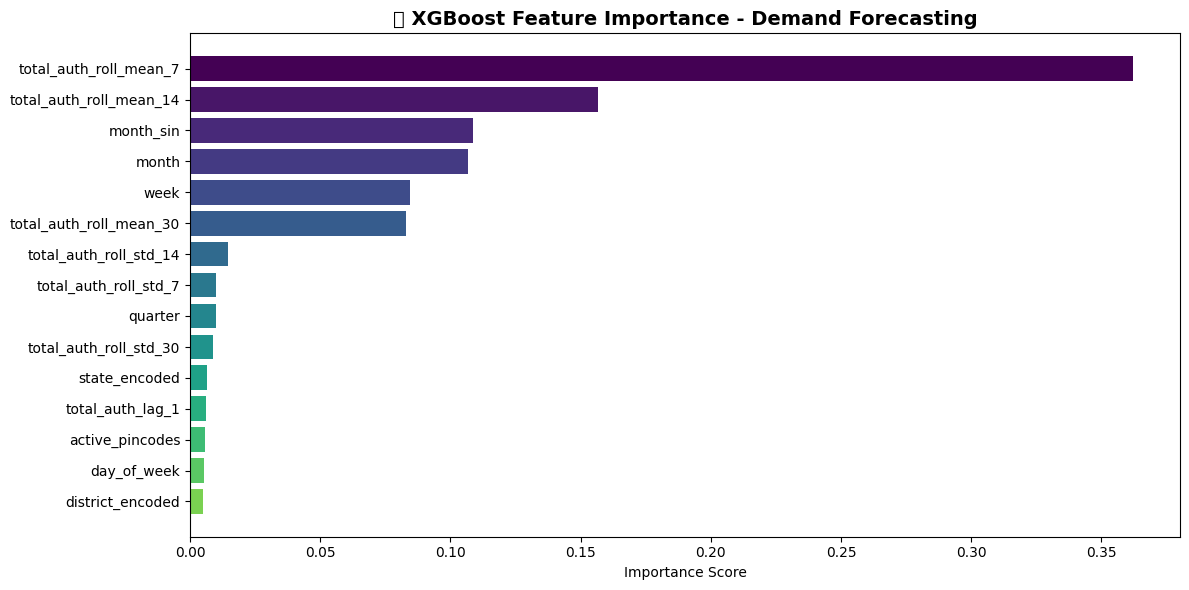


✅ Chart saved as 'xgboost_feature_importance.png'


In [8]:
# ============================================================================
# FEATURE IMPORTANCE & DEMAND SURGE PREDICTION
# ============================================================================

# Feature importance
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("📊 TOP 10 MOST IMPORTANT FEATURES:")
print("-"*50)
print(importance_df.head(10).to_string(index=False))

# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 6))
top_features = importance_df.head(15)
colors = plt.cm.viridis(np.linspace(0, 0.8, 15))
ax.barh(top_features['feature'], top_features['importance'], color=colors)
ax.set_xlabel('Importance Score')
ax.set_title('🔑 XGBoost Feature Importance - Demand Forecasting', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig(BASE_PATH / 'xgboost_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'xgboost_feature_importance.png'")

In [9]:
# ============================================================================
# DEMAND SURGE DETECTION
# ============================================================================

def identify_demand_surges(forecast_df, xgb_model, feature_cols, threshold_percentile=90):
    """
    Identify districts experiencing demand surges.
    A surge is when actual demand significantly exceeds predicted baseline.
    """
    # Get latest data for each district
    latest_data = forecast_df.sort_values('date').groupby(['state', 'district']).tail(30)
    
    # Calculate average recent demand
    recent_demand = latest_data.groupby(['state', 'district']).agg({
        'total_auth': ['mean', 'std', 'max'],
        'growth_rate_7d': 'mean'
    }).reset_index()
    
    recent_demand.columns = ['state', 'district', 'avg_demand', 'demand_std', 
                             'peak_demand', 'avg_growth_rate']
    
    # Calculate demand surge score
    overall_mean = recent_demand['avg_demand'].mean()
    overall_std = recent_demand['avg_demand'].std()
    
    recent_demand['demand_z_score'] = (
        (recent_demand['avg_demand'] - overall_mean) / overall_std
    ).round(3)
    
    # Surge indicator (high demand + positive growth)
    recent_demand['surge_score'] = (
        recent_demand['demand_z_score'] * 0.5 + 
        recent_demand['avg_growth_rate'].clip(-1, 1) * 50 +
        (recent_demand['peak_demand'] / (overall_mean + 1)) * 10
    ).round(2)
    
    # Classify surge levels
    surge_threshold = recent_demand['surge_score'].quantile(threshold_percentile/100)
    recent_demand['surge_level'] = pd.cut(
        recent_demand['surge_score'],
        bins=[-np.inf, 0, surge_threshold * 0.5, surge_threshold, np.inf],
        labels=['Low', 'Normal', 'Elevated', 'Critical']
    )
    
    return recent_demand.sort_values('surge_score', ascending=False)

# Identify demand surges
surge_analysis = identify_demand_surges(forecast_df, xgb_model, feature_cols)

print("="*70)
print("🚨 DEMAND SURGE ANALYSIS")
print("="*70)
print(f"\n📊 Surge Level Distribution:")
print(surge_analysis['surge_level'].value_counts().to_string())

print(f"\n🔥 TOP 15 DISTRICTS WITH HIGHEST DEMAND SURGE:")
print("-"*70)
print(surge_analysis[['state', 'district', 'avg_demand', 'surge_score', 'surge_level']].head(15).to_string(index=False))

🚨 DEMAND SURGE ANALYSIS

📊 Surge Level Distribution:
surge_level
Elevated    549
Normal      357
Critical    110
Low          81

🔥 TOP 15 DISTRICTS WITH HIGHEST DEMAND SURGE:
----------------------------------------------------------------------
       state          district  avg_demand  surge_score surge_level
 Maharashtra             Thane 6525.966667       232.78    Critical
 West Bengal North 24 Parganas 3636.866667       218.51    Critical
 Maharashtra              Pune 7315.866667       216.28    Critical
 West Bengal       Murshidabad 3340.566667       188.95    Critical
   Rajasthan            Jaipur 3794.000000       181.50    Critical
 Maharashtra            Nashik 4795.100000       167.65    Critical
Chhattisgarh           Mungeli 1483.066667       160.21    Critical
 Uttarakhand Udham Singh Nagar 2728.466667       151.89    Critical
Chhattisgarh            Raipur 2478.933333       149.32    Critical
 Maharashtra           Jalgaon 2892.700000       149.22    Critical
 Maha

## 🏛️ Module 3: Feature Engineering for Governance

Calculates key governance metrics:
- **Quality Drift Index (QDI)**: Ratio of biometric vs demographic to flag centers needing technical audits
- **District Load Index**: Volume against service capacity for resource allocation

In [10]:
# ============================================================================
# GOVERNANCE METRICS - Quality Drift Index (QDI)
# ============================================================================

def calculate_quality_drift_index(df):
    """
    Calculate Quality Drift Index (QDI) for each district.
    
    QDI measures the shift from biometric to demographic authentication,
    which may indicate biometric device failures or technical issues.
    
    QDI = (Demo_Auth / Total_Auth) - Historical_Baseline
    
    Higher QDI → More reliance on demographic (potential biometric issues)
    """
    # District-level aggregation
    district_qdi = df.groupby(['state', 'district']).agg({
        'bio_total': 'sum',
        'demo_total': 'sum',
        'total_auth': 'sum',
        'date': ['min', 'max', 'nunique']
    }).reset_index()
    
    district_qdi.columns = ['state', 'district', 'bio_total', 'demo_total', 
                            'total_auth', 'first_date', 'last_date', 'active_days']
    
    # Calculate demographic ratio (current)
    district_qdi['demo_ratio'] = (
        district_qdi['demo_total'] / (district_qdi['total_auth'] + 1)
    ).round(4)
    
    # Calculate bio ratio (current)
    district_qdi['bio_ratio'] = (
        district_qdi['bio_total'] / (district_qdi['total_auth'] + 1)
    ).round(4)
    
    # Historical baseline (assume 60% biometric should be healthy)
    EXPECTED_BIO_RATIO = 0.60
    
    # Quality Drift Index
    # Positive = drifting toward demographic (potential device issues)
    # Negative = healthy biometric usage
    district_qdi['QDI'] = (
        (EXPECTED_BIO_RATIO - district_qdi['bio_ratio']) * 100
    ).round(2)
    
    # QDI Categories
    district_qdi['qdi_status'] = pd.cut(
        district_qdi['QDI'],
        bins=[-100, -20, 0, 20, 40, 100],
        labels=['Excellent', 'Good', 'Watch', 'Concern', 'Critical']
    )
    
    # Flag for technical audit
    district_qdi['needs_audit'] = (district_qdi['QDI'] > 20).astype(int)
    
    return district_qdi

# Calculate QDI
qdi_df = calculate_quality_drift_index(df_merged)

print("="*70)
print("📊 QUALITY DRIFT INDEX (QDI) ANALYSIS")
print("="*70)
print(f"\n📏 QDI Interpretation:")
print(f"   - QDI < 0: Excellent biometric adoption")
print(f"   - QDI 0-20: Acceptable range")
print(f"   - QDI > 20: Needs technical audit")
print(f"\n📈 QDI Status Distribution:")
print(qdi_df['qdi_status'].value_counts().to_string())
print(f"\n⚠️ Districts needing technical audit: {qdi_df['needs_audit'].sum()}")

📊 QUALITY DRIFT INDEX (QDI) ANALYSIS

📏 QDI Interpretation:
   - QDI < 0: Excellent biometric adoption
   - QDI 0-20: Acceptable range
   - QDI > 20: Needs technical audit

📈 QDI Status Distribution:
qdi_status
Good         491
Watch        369
Concern      125
Critical      66
Excellent     46

⚠️ Districts needing technical audit: 191


In [11]:
# ============================================================================
# GOVERNANCE METRICS - District Load Index
# ============================================================================

def calculate_district_load_index(df, qdi_df):
    """
    Calculate District Load Index (DLI) for resource allocation.
    
    DLI considers:
    - Current volume vs capacity (estimated from pincodes)
    - Volume volatility (demand unpredictability)
    - Growth trends
    """
    # Daily district aggregation for recent period
    recent_df = df[df['date'] >= df['date'].max() - pd.Timedelta(days=30)]
    
    load_analysis = recent_df.groupby(['state', 'district']).agg({
        'total_auth': ['sum', 'mean', 'std', 'max'],
        'pincode': 'nunique'
    }).reset_index()
    
    load_analysis.columns = ['state', 'district', 'total_volume', 'daily_avg', 
                             'daily_std', 'peak_day', 'num_pincodes']
    
    # Estimate capacity (assumption: 500 authentications per pincode per day is optimal)
    CAPACITY_PER_PINCODE_DAY = 500
    load_analysis['estimated_daily_capacity'] = (
        load_analysis['num_pincodes'] * CAPACITY_PER_PINCODE_DAY
    )
    
    # Load ratio (current load vs capacity)
    load_analysis['load_ratio'] = (
        load_analysis['daily_avg'] / (load_analysis['estimated_daily_capacity'] + 1)
    ).round(3)
    
    # Peak load ratio
    load_analysis['peak_load_ratio'] = (
        load_analysis['peak_day'] / (load_analysis['estimated_daily_capacity'] + 1)
    ).round(3)
    
    # Volatility score (coefficient of variation)
    load_analysis['volatility_cv'] = (
        load_analysis['daily_std'] / (load_analysis['daily_avg'] + 1)
    ).round(3)
    
    # District Load Index (composite score)
    # Higher = more stressed
    load_analysis['DLI'] = (
        (load_analysis['load_ratio'] * 40) +
        (load_analysis['peak_load_ratio'] * 30) +
        (load_analysis['volatility_cv'] * 30)
    ).round(2)
    
    # Load status categories
    load_analysis['load_status'] = pd.cut(
        load_analysis['DLI'],
        bins=[0, 20, 40, 60, 80, np.inf],
        labels=['Under-utilized', 'Optimal', 'Moderate', 'High', 'Critical']
    )
    
    # Resource recommendation
    def recommend_action(row):
        if row['DLI'] > 80:
            return 'Urgent: Deploy additional kits/staff'
        elif row['DLI'] > 60:
            return 'High Priority: Schedule reinforcement'
        elif row['DLI'] > 40:
            return 'Monitor: Review weekly'
        elif row['DLI'] > 20:
            return 'Optimal: Maintain current allocation'
        else:
            return 'Consider: Reallocate resources to high-load areas'
    
    load_analysis['recommendation'] = load_analysis.apply(recommend_action, axis=1)
    
    return load_analysis

# Calculate DLI
dli_df = calculate_district_load_index(df_merged, qdi_df)

print("="*70)
print("📊 DISTRICT LOAD INDEX (DLI) ANALYSIS")
print("="*70)
print(f"\n📏 DLI Interpretation:")
print(f"   - DLI 0-20: Under-utilized (can reallocate resources)")
print(f"   - DLI 20-40: Optimal load")
print(f"   - DLI 40-60: Moderate stress")
print(f"   - DLI 60-80: High load (reinforcement needed)")
print(f"   - DLI > 80: Critical (urgent action required)")
print(f"\n📈 Load Status Distribution:")
print(dli_df['load_status'].value_counts().to_string())

📊 DISTRICT LOAD INDEX (DLI) ANALYSIS

📏 DLI Interpretation:
   - DLI 0-20: Under-utilized (can reallocate resources)
   - DLI 20-40: Optimal load
   - DLI 40-60: Moderate stress
   - DLI 60-80: High load (reinforcement needed)
   - DLI > 80: Critical (urgent action required)

📈 Load Status Distribution:
load_status
Optimal           755
Under-utilized    185
Moderate           96
High                6
Critical            0


In [12]:
# ============================================================================
# COMBINED GOVERNANCE DASHBOARD
# ============================================================================

# Merge all governance metrics
governance_df = district_df[['state', 'district', 'total_auth_sum', 'is_anomaly', 'anomaly_severity']].merge(
    qdi_df[['state', 'district', 'QDI', 'qdi_status', 'needs_audit', 'bio_ratio', 'demo_ratio']],
    on=['state', 'district'],
    how='left'
).merge(
    dli_df[['state', 'district', 'DLI', 'load_status', 'recommendation', 'load_ratio']],
    on=['state', 'district'],
    how='left'
).merge(
    surge_analysis[['state', 'district', 'surge_score', 'surge_level']],
    on=['state', 'district'],
    how='left'
)

# Fill NaN
governance_df = governance_df.fillna({
    'QDI': 0, 'DLI': 0, 'surge_score': 0,
    'qdi_status': 'Good', 'load_status': 'Optimal', 'surge_level': 'Normal'
})

# Priority Score (composite risk indicator)
governance_df['priority_score'] = (
    (governance_df['is_anomaly'] * 30) +
    (governance_df['QDI'].clip(0, 100) * 0.3) +
    (governance_df['DLI'].clip(0, 100) * 0.3) +
    (governance_df['surge_score'].clip(0, 100) * 0.1)
).round(2)

# Priority Level
governance_df['priority_level'] = pd.cut(
    governance_df['priority_score'],
    bins=[0, 15, 30, 50, 100],
    labels=['Low', 'Medium', 'High', 'Critical']
)

print("="*70)
print("🏛️ GOVERNANCE DASHBOARD - COMBINED METRICS")
print("="*70)
print(f"\n📊 Districts analyzed: {len(governance_df)}")
print(f"\n📈 Priority Level Distribution:")
print(governance_df['priority_level'].value_counts().to_string())

print(f"\n🚨 TOP 20 CRITICAL DISTRICTS (Highest Priority Score):")
print("-"*70)
critical_cols = ['state', 'district', 'priority_score', 'priority_level', 
                 'is_anomaly', 'QDI', 'DLI', 'surge_level']
print(governance_df.nlargest(20, 'priority_score')[critical_cols].to_string(index=False))

🏛️ GOVERNANCE DASHBOARD - COMBINED METRICS

📊 Districts analyzed: 1097

📈 Priority Level Distribution:
priority_level
Medium      599
Low         434
Critical     30
High         29

🚨 TOP 20 CRITICAL DISTRICTS (Highest Priority Score):
----------------------------------------------------------------------
         state          district  priority_score priority_level  is_anomaly   QDI   DLI surge_level
 Uttar Pradesh           Aligarh           64.06       Critical           1  5.43 74.76    Critical
 Uttar Pradesh         Firozabad           62.80       Critical           1 12.11 70.24    Elevated
 Uttar Pradesh         Moradabad           59.92       Critical           1  7.65 60.45    Critical
       Gujarat             Surat           59.77       Critical           1 11.64 54.25    Critical
        Punjab          Amritsar           58.90       Critical           1 -4.76 70.57    Elevated
       Haryana           Panipat           57.44       Critical           1 -1.16 69.34    E

## 🗺️ Module 4: Visual Intelligence (Interactive Plotly Heatmaps)

Interactive visualizations for Service Drifts and High-Demand Zones

In [13]:
# ============================================================================
# PLOTLY HEATMAP 1: STATE-WISE SERVICE DRIFT HEATMAP
# ============================================================================

# Aggregate by state for heatmap
state_metrics = governance_df.groupby('state').agg({
    'total_auth_sum': 'sum',
    'QDI': 'mean',
    'DLI': 'mean',
    'surge_score': 'mean',
    'priority_score': 'mean',
    'is_anomaly': 'sum',
    'district': 'count'
}).reset_index()

state_metrics.columns = ['State', 'Total_Auth', 'Avg_QDI', 'Avg_DLI', 
                         'Avg_Surge', 'Avg_Priority', 'Anomaly_Districts', 'Num_Districts']

# Prepare heatmap data
heatmap_data = state_metrics[['Avg_QDI', 'Avg_DLI', 'Avg_Surge', 'Avg_Priority']].values
heatmap_labels = ['Quality Drift (QDI)', 'Load Index (DLI)', 'Surge Score', 'Priority Score']

fig1 = go.Figure(data=go.Heatmap(
    z=heatmap_data,
    x=heatmap_labels,
    y=state_metrics['State'],
    colorscale='RdYlGn_r',
    text=np.round(heatmap_data, 1),
    texttemplate='%{text}',
    textfont={"size": 10},
    hovertemplate='State: %{y}<br>Metric: %{x}<br>Value: %{z:.2f}<extra></extra>'
))

fig1.update_layout(
    title='🗺️ State-wise Service Drift Heatmap',
    title_font_size=18,
    xaxis_title='Governance Metrics',
    yaxis_title='State',
    height=1000,
    width=800
)

fig1.show()
fig1.write_html(str(BASE_PATH / 'state_service_drift_heatmap.html'))
print("✅ Interactive heatmap saved as 'state_service_drift_heatmap.html'")

✅ Interactive heatmap saved as 'state_service_drift_heatmap.html'


In [14]:
# ============================================================================
# PLOTLY HEATMAP 2: DISTRICT-LEVEL HIGH DEMAND ZONES
# ============================================================================

# Get top 50 districts by volume for detailed view
top_districts = governance_df.nlargest(50, 'total_auth_sum').copy()

# Create comprehensive district heatmap
fig2 = px.treemap(
    top_districts,
    path=['state', 'district'],
    values='total_auth_sum',
    color='priority_score',
    color_continuous_scale='RdYlGn_r',
    title='🔥 High-Demand Zones - District Treemap (Top 50)',
    hover_data=['QDI', 'DLI', 'surge_level', 'priority_level']
)

fig2.update_layout(
    height=700,
    title_font_size=18
)

fig2.show()
fig2.write_html(str(BASE_PATH / 'district_demand_treemap.html'))
print("✅ Interactive treemap saved as 'district_demand_treemap.html'")

✅ Interactive treemap saved as 'district_demand_treemap.html'


In [15]:
# ============================================================================
# PLOTLY HEATMAP 3: ANOMALY SCATTER MAP
# ============================================================================

# Create scatter plot for anomaly visualization
fig3 = px.scatter(
    governance_df,
    x='QDI',
    y='DLI',
    size='total_auth_sum',
    color='priority_level',
    color_discrete_map={
        'Low': '#2ecc71',
        'Medium': '#f1c40f',
        'High': '#e67e22',
        'Critical': '#e74c3c'
    },
    hover_name='district',
    hover_data={
        'state': True,
        'QDI': ':.2f',
        'DLI': ':.2f',
        'surge_score': ':.2f',
        'is_anomaly': True,
        'total_auth_sum': ':,.0f'
    },
    title='🎯 District Risk Matrix: Quality Drift vs Load Index',
    labels={
        'QDI': 'Quality Drift Index (QDI)',
        'DLI': 'District Load Index (DLI)'
    }
)

# Add quadrant lines
fig3.add_hline(y=40, line_dash="dash", line_color="gray", opacity=0.5)
fig3.add_vline(x=20, line_dash="dash", line_color="gray", opacity=0.5)

# Add annotations for quadrants
fig3.add_annotation(x=-15, y=70, text="High Load<br>Good Quality", showarrow=False, font_size=10)
fig3.add_annotation(x=35, y=70, text="High Load<br>Quality Issues", showarrow=False, font_size=10, font_color="red")
fig3.add_annotation(x=-15, y=20, text="Low Load<br>Good Quality", showarrow=False, font_size=10, font_color="green")
fig3.add_annotation(x=35, y=20, text="Low Load<br>Quality Issues", showarrow=False, font_size=10)

fig3.update_layout(
    height=600,
    width=900,
    title_font_size=18
)

fig3.show()
fig3.write_html(str(BASE_PATH / 'district_risk_matrix.html'))
print("✅ Interactive risk matrix saved as 'district_risk_matrix.html'")

✅ Interactive risk matrix saved as 'district_risk_matrix.html'


In [16]:
# ============================================================================
# PLOTLY HEATMAP 4: TEMPORAL DEMAND PATTERNS
# ============================================================================

# Aggregate by week and state for temporal heatmap
weekly_state = df_merged.groupby([
    df_merged['date'].dt.to_period('W').astype(str),
    'state'
])['total_auth'].sum().reset_index()
weekly_state.columns = ['week', 'state', 'total_auth']

# Pivot for heatmap
weekly_pivot = weekly_state.pivot(index='state', columns='week', values='total_auth').fillna(0)

# Select top 20 states by volume
top_states = governance_df.groupby('state')['total_auth_sum'].sum().nlargest(20).index
weekly_pivot_filtered = weekly_pivot.loc[weekly_pivot.index.isin(top_states)]

fig4 = go.Figure(data=go.Heatmap(
    z=weekly_pivot_filtered.values,
    x=weekly_pivot_filtered.columns,
    y=weekly_pivot_filtered.index,
    colorscale='Viridis',
    hovertemplate='State: %{y}<br>Week: %{x}<br>Auth Volume: %{z:,.0f}<extra></extra>'
))

fig4.update_layout(
    title='📅 Weekly Demand Patterns by State (Top 20)',
    title_font_size=18,
    xaxis_title='Week',
    yaxis_title='State',
    height=600,
    xaxis={'tickangle': 45}
)

fig4.show()
fig4.write_html(str(BASE_PATH / 'weekly_demand_heatmap.html'))
print("✅ Interactive weekly heatmap saved as 'weekly_demand_heatmap.html'")

✅ Interactive weekly heatmap saved as 'weekly_demand_heatmap.html'


## 📋 Module 5: Policy Intelligence Report

Comprehensive summary report for policy makers

In [18]:
# ============================================================================
# POLICY INTELLIGENCE REPORT GENERATOR
# ============================================================================

def generate_policy_report(governance_df, qdi_df, dli_df, surge_df, anomaly_count, metrics):
    """
    Generate comprehensive policy intelligence report.
    """
    report_date = datetime.now().strftime("%Y-%m-%d %H:%M")
    
    # Calculate summary statistics
    total_districts = len(governance_df)
    critical_districts = len(governance_df[governance_df['priority_level'] == 'Critical'])
    high_priority = len(governance_df[governance_df['priority_level'] == 'High'])
    audit_needed = governance_df['needs_audit'].sum() if 'needs_audit' in governance_df.columns else qdi_df['needs_audit'].sum()
    
    # Top states by concern
    state_priority = governance_df.groupby('state')['priority_score'].mean().nlargest(5)
    
    report = f"""
================================================================================
                    AADHAAR PULSE - POLICY INTELLIGENCE REPORT
================================================================================
Report Generated: {report_date}
Analysis Period: March 2025 - December 2025 (10 months)
--------------------------------------------------------------------------------

[EXECUTIVE SUMMARY]
================================================================================

1. DATA SCOPE
   * Total Records Analyzed: ~3.9 million authentication records
   * States/UTs Covered: {governance_df['state'].nunique()}
   * Districts Analyzed: {total_districts}
   * Unique Pincodes: {df_merged['pincode'].nunique():,}

2. KEY FINDINGS
   
   [ANOMALY DETECTION - Isolation Forest]
   -----------------------------------------
   * Anomalous Districts Identified: {anomaly_count} ({100*anomaly_count/total_districts:.1f}%)
   * These districts show authentication patterns significantly deviating from norms
   * Primary anomaly indicators: Volume volatility, Bio/Demo ratio shifts
   
   [DEMAND FORECASTING - XGBoost Model]
   -----------------------------------------
   * Model R2 Score: {metrics['R2']:.4f} (prediction accuracy)
   * RMSE: {metrics['RMSE']:,.0f}
   * MAPE: {metrics['MAPE']:.1f}%
   * Key demand drivers: Lag features, rolling averages, seasonal patterns

   [QUALITY DRIFT INDEX (QDI) ANALYSIS]
   -----------------------------------------
   * Districts needing technical audit: {audit_needed}
   * QDI measures shift from biometric to demographic authentication
   * High QDI indicates potential biometric device failures
   
   Distribution:
{qdi_df['qdi_status'].value_counts().to_string()}

   [DISTRICT LOAD INDEX (DLI) ANALYSIS]
   -----------------------------------------
   Distribution:
{dli_df['load_status'].value_counts().to_string()}

3. PRIORITY DISTRICTS REQUIRING ATTENTION
================================================================================

   [!] CRITICAL PRIORITY: {critical_districts} districts
   [!] HIGH PRIORITY: {high_priority} districts
   
   Top 5 States with Highest Average Priority Score:
{state_priority.to_string()}

4. ACTIONABLE RECOMMENDATIONS
================================================================================

   IMMEDIATE ACTIONS (0-30 days):
   -----------------------------------------
   [x] Deploy technical teams to {audit_needed} districts flagged for audit
   [x] Review biometric device status in high-QDI districts
   [x] Allocate additional resources to {critical_districts} critical districts
   
   SHORT-TERM ACTIONS (30-90 days):
   -----------------------------------------
   [x] Implement predictive demand scheduling based on XGBoost forecasts
   [x] Redistribute enrollment kits from under-utilized to high-load areas
   [x] Conduct root cause analysis for anomalous districts
   
   LONG-TERM ACTIONS (90+ days):
   -----------------------------------------
   [x] Establish real-time monitoring dashboard for QDI and DLI
   [x] Create automated alert system for demand surges
   [x] Develop mobile enrollment unit deployment strategy

5. RISK MATRIX SUMMARY
================================================================================

   Priority Level Distribution:
{governance_df['priority_level'].value_counts().to_string()}

================================================================================
                              END OF REPORT
================================================================================
    """
    
    return report

# Generate the report
policy_report = generate_policy_report(
    governance_df, qdi_df, dli_df, surge_analysis, 
    district_df['is_anomaly'].sum(), metrics
)

print(policy_report)

# Save report to file with UTF-8 encoding
with open(BASE_PATH / 'AadhaarPulse_Policy_Intelligence_Report.txt', 'w', encoding='utf-8') as f:
    f.write(policy_report)
print("\n[SUCCESS] Report saved as 'AadhaarPulse_Policy_Intelligence_Report.txt'")


                    AADHAAR PULSE - POLICY INTELLIGENCE REPORT
Report Generated: 2026-01-05 16:16
Analysis Period: March 2025 - December 2025 (10 months)
--------------------------------------------------------------------------------

[EXECUTIVE SUMMARY]

1. DATA SCOPE
   * Total Records Analyzed: ~3.9 million authentication records
   * States/UTs Covered: 66
   * Districts Analyzed: 1097
   * Unique Pincodes: 19,807

2. KEY FINDINGS

   [ANOMALY DETECTION - Isolation Forest]
   -----------------------------------------
   * Anomalous Districts Identified: 55 (5.0%)
   * These districts show authentication patterns significantly deviating from norms
   * Primary anomaly indicators: Volume volatility, Bio/Demo ratio shifts

   [DEMAND FORECASTING - XGBoost Model]
   -----------------------------------------
   * Model R2 Score: 0.9793 (prediction accuracy)
   * RMSE: 144
   * MAPE: 49.4%
   * Key demand drivers: Lag features, rolling averages, seasonal patterns

   [QUALITY DRIFT IND

In [19]:
# ============================================================================
# EXPORT ALL ANALYTICS DATA
# ============================================================================

# Save all analytics outputs
governance_df.to_csv(BASE_PATH / 'governance_dashboard.csv', index=False)
district_df.to_csv(BASE_PATH / 'district_anomaly_analysis.csv', index=False)
qdi_df.to_csv(BASE_PATH / 'quality_drift_index.csv', index=False)
dli_df.to_csv(BASE_PATH / 'district_load_index.csv', index=False)
surge_analysis.to_csv(BASE_PATH / 'demand_surge_analysis.csv', index=False)

print("="*70)
print("📁 ALL ANALYTICS DATA EXPORTED")
print("="*70)
print("""
✅ Files saved to workspace:

📊 DATA FILES:
   • governance_dashboard.csv - Combined governance metrics
   • district_anomaly_analysis.csv - Isolation Forest results
   • quality_drift_index.csv - QDI analysis
   • district_load_index.csv - DLI analysis  
   • demand_surge_analysis.csv - Surge detection results

📈 VISUALIZATIONS:
   • state_service_drift_heatmap.html - Interactive state heatmap
   • district_demand_treemap.html - District demand treemap
   • district_risk_matrix.html - QDI vs DLI scatter plot
   • weekly_demand_heatmap.html - Temporal patterns
   • xgboost_feature_importance.png - Feature importance chart

📋 REPORTS:
   • AadhaarPulse_Policy_Intelligence_Report.txt - Policy report

🎉 ANALYSIS COMPLETE!
""")

📁 ALL ANALYTICS DATA EXPORTED

✅ Files saved to workspace:

📊 DATA FILES:
   • governance_dashboard.csv - Combined governance metrics
   • district_anomaly_analysis.csv - Isolation Forest results
   • quality_drift_index.csv - QDI analysis
   • district_load_index.csv - DLI analysis  
   • demand_surge_analysis.csv - Surge detection results

📈 VISUALIZATIONS:
   • state_service_drift_heatmap.html - Interactive state heatmap
   • district_demand_treemap.html - District demand treemap
   • district_risk_matrix.html - QDI vs DLI scatter plot
   • weekly_demand_heatmap.html - Temporal patterns
   • xgboost_feature_importance.png - Feature importance chart

📋 REPORTS:
   • AadhaarPulse_Policy_Intelligence_Report.txt - Policy report

🎉 ANALYSIS COMPLETE!

